In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
file_path = "Dataset .csv"  # Update this if needed
df = pd.read_csv(file_path, on_bad_lines='skip', quoting=1)

In [4]:
expected_cols = ['Rating text', 'Aggregate rating']
df.columns = [col.strip() for col in df.columns]
print("Available columns:", df.columns)

Available columns: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


## Analyze the text reviews to identify the most common positive and negative keywords.

In [5]:
rating_text_col = 'Rating text'
rating_col = 'Aggregate rating'

In [6]:
df = df.dropna(subset=[rating_text_col, rating_col])

In [7]:
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

In [8]:
rating_text_counts = df[rating_text_col].value_counts()
print("\nMost common Rating Text values:")
print(rating_text_counts)


Most common Rating Text values:
Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64


In [9]:
positive_texts = ['Excellent', 'Very Good', 'Good']
negative_texts = ['Poor', 'Average', 'Not rated']

In [10]:
positive_keywords = {text: rating_text_counts[text] for text in positive_texts if text in rating_text_counts}
negative_keywords = {text: rating_text_counts[text] for text in negative_texts if text in rating_text_counts}

In [11]:
print("\nPositive Rating Keywords & Counts:")
print(positive_keywords)

print("\nNegative Rating Keywords & Counts:")
print(negative_keywords)


Positive Rating Keywords & Counts:
{'Excellent': 301, 'Very Good': 1079, 'Good': 2100}

Negative Rating Keywords & Counts:
{'Poor': 186, 'Average': 3737, 'Not rated': 2148}


## Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [12]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import nltk
nltk.download('punkt')  # <== ADD THIS LINE BEFORE USING word_tokenize
nltk.download('stopwords')  # Already included, but make sure it's here too

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
def clean_and_count_words(text):
    tokens = word_tokenize(str(text).lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return len(words)

In [17]:
df['Review Length'] = df[rating_text_col].apply(clean_and_count_words)
average_length = df['Review Length'].mean()
print(f"\nAverage Review Length (in words): {average_length:.2f}")


Average Review Length (in words): 1.00


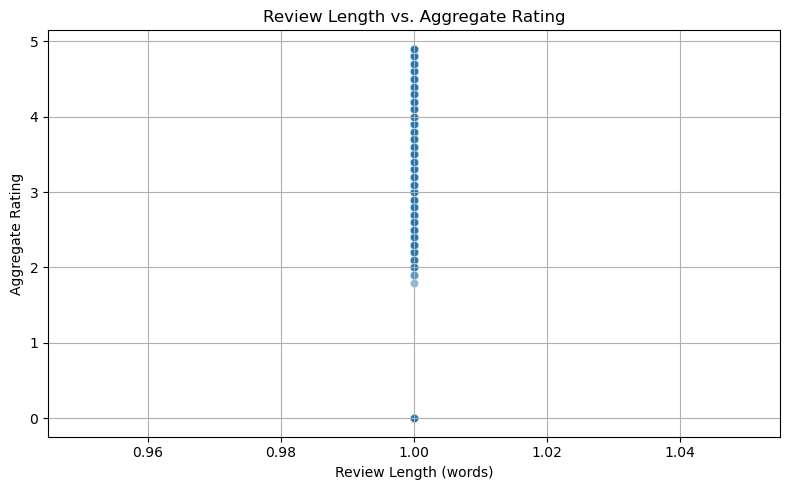

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Review Length', y=rating_col, alpha=0.5)
plt.title("Review Length vs. Aggregate Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Aggregate Rating")
plt.grid(True)
plt.tight_layout()
plt.show()